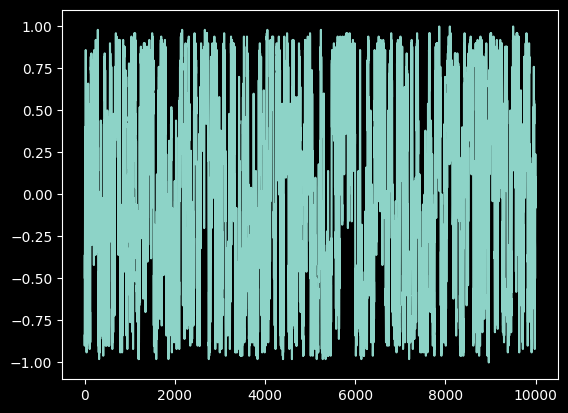

In [2]:
import numpy as np
import matplotlib.pylab as plt

# Original code by Prof

def transitionFunctionValues(t, h=0):

    deltaE = [[j + i * h for i in range(-1, 3, 2)] for j in range(-4, 6, 2)]
    output = [
        [1 if elem <= 0 else np.exp(-2 * elem / t) for elem in row] for row in deltaE
    ]

    return np.array(output)


def w(sigma, sigSoma, valuesW):

    i = int(sigSoma / 2 + 2)
    j = int(sigma / 2 + 1 / 2)

    return valuesW[i, j]


def vizinhosTabela(tamanho):

    vizMais = [i + 1 for i in range(tamanho)]
    vizMais[-1] = 0
    vizMenos = [i - 1 for i in range(tamanho)]

    return np.array([vizMais, vizMenos])


def inicializacao(tamanho, valor=-1):

    if valor != 0:
        rede = np.full((tamanho, tamanho), valor, dtype="int")
    else:
        rede = np.random.choice([-1, 1], size=(tamanho, tamanho))
    return rede


def cicloFerro(rede, tamanho, vizinhos, valuesW, h):

    e = 0
    for i in range(tamanho):
        for j in range(tamanho):
            sigma = rede[i, j]  # Direcção do spin do ponto de rede
            # A soma das direcções dos primeiros vizinhos
            soma = (
                rede[vizinhos[0, i], j]
                + rede[vizinhos[1, i], j]
                + rede[i, vizinhos[0, j]]
                + rede[i, vizinhos[1, j]]
            )
            soma *= sigma
            etmp = -0.5 * (soma - sigma * h)
            p = (
                np.random.random()
            )  # Número aleatório entre 0 e 1, distribuição uniforme

            if p < w(sigma, soma, valuesW):
                rede[i, j] = -sigma
                etmp = -etmp

            e += etmp

    return rede, e


def ferroSimul(tamanho, nCiclos, temp, h):

    rede = inicializacao(tamanho)

    valuesW = transitionFunctionValues(temp, h)

    vizinhos = vizinhosTabela(tamanho)

    order = np.zeros(nCiclos)

    e = np.zeros(nCiclos)

    for i in range(nCiclos):
        rede, eCiclo = cicloFerro(rede, tamanho, vizinhos, valuesW, h)

        order[i] = 2 * rede[rede == 1].shape[0] - tamanho**2

        e[i] = eCiclo

    order /= tamanho**2
    e /= tamanho**2

    return rede, order, e


t = 2.5
h = 0.0
tamanho = 10
rede, order, e = ferroSimul(tamanho, 10000, t, h)
plt.plot(order)
plt.show()